In [1]:
import os
#os.system("python -m pip install Pillow")
import matplotlib.pyplot as pl
import numpy as np
import glob
import pandas as pd


In [2]:

path = 'C:/Users/VanHa/OneDrive - THT/UPC Materials/Statistcal programing and databases/ClassPics'
path1 = ('./ClassPics')
folders = [f for f in glob.glob(path1 + "**/*", recursive=True)]
folder= [f.replace('\\', '/') for f in folders]

In [94]:
#for r, d, f in os.walk(path):
    #print(r.replace("\", r"/"))


In [3]:
subfolder=[]
for sub in folder: 
    for r, d, f in os.walk(sub):
        for file in f:
            subfolder.append(os.path.join(r, file))
            #print(file)
sub_path = [s.replace('\\', '/') for s in subfolder]   
sub_path[1]

'./ClassPics/Boixader Tomás Marcel_31444166_assignsubmission_file_/foto2.jpg'

In [4]:
folder_name =[]
for entry in os.listdir(path):
    if os.path.isdir(os.path.join(path, entry)):
        folder_name.append(entry)
        
        #=[] print(entry[:-(entry.find('_')-1)])
name= [entry[:(entry.find('_'))] for entry in  folder_name]  

In [5]:
## dataframe to save info of image
df = pd.DataFrame(list(zip(sub_path, name, folder_name)), columns =["Path", "Name", "Folder"])
df
df.shape

(25, 3)

(86, 85, 3)

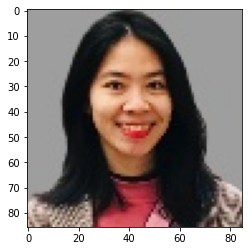

In [6]:

I = pl.imread((sub_path[15]))
pl.imshow(I)
np.shape(I)

**1. Compute the mean representative and plot the image corresponding to the mean representative (dataset provided below)**

array([158.        , 158.        , 158.        , ..., 150.66666667,
       132.66666667,  56.66666667])

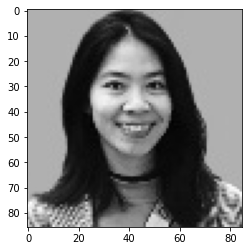

In [7]:
I_mean = pl.imread((sub_path[15])).mean(axis=2)
img_sh= pl.imshow(I_mean)
img_sh.set_cmap('gray')
np.shape(I_mean)
I_mean.ravel()


In [56]:
# import cv2

# for i in range(0, len(df["Path"])):
#     Img = pl.imread((sub_path[i]))
#     #croppedImage = Img[startRow:endRow, startCol:endCol]
#     newImg = cv2.resize(Img, (85,86))
#     path_save ='C:/Users/VanHa/OneDrive - THT/UPC Materials/Statistcal programing and databases/ClassPics_new/'+ df["Name"][i]+'.jpg'
#     #print(path_save)
#     resizedImg = cv2.imwrite(path_save, newImg)
#     cv2.waitKey(0)

In [8]:
path2 = 'C:/Users/VanHa/OneDrive - THT/UPC Materials/Statistcal programing and databases/ClassPics_new'
temp = []
for r, d, f in os.walk(path2):
        for file in f:
            temp.append(os.path.join(r, file))
            
new_folder = [s.replace('\\', '/') for s in temp]   
len(new_folder)           

25

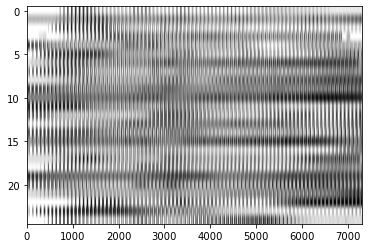

In [10]:
## compile all the images and calculate the mean

X=np.array([pl.imread(f).mean(axis=2).ravel()for f in new_folder])
X.shape
pl.imshow(X,aspect='auto')
pl.set_cmap('gray')


In [30]:
# plt= plot(X.mean(axis=-1),'o')
# title( "The mean of each image")

**2.Compute the standard deviation and plot the corresponding image**

Text(0.5, 1.0, 'The variance of each image')

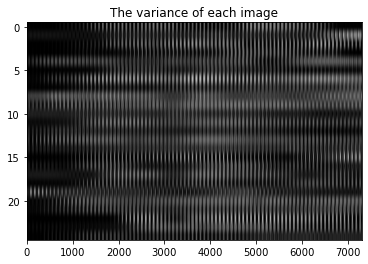

In [29]:
st_img = np.array([pl.imread(f).std(axis=2).ravel()for f in new_folder])
pl.imshow(st_img,aspect='auto')
pl.set_cmap('gray')

**3. Run a k-means clustering and split the representatives' data into 10 groups. Plot the full set of images for two groups of your choice.**

In [31]:
##return one-array 
def transform(i):
    read_img = pl.imread(new_folder[i])
    X = read_img.reshape(len(read_img),-1)
    X = X.astype(float) / 255.
    return X

In [38]:
# allArrays = np.concatenate([transform(x) for x in range(0, len(new_folder)-1)]) 
# allArrays.shape
test_fc= transform(1)
print(test_fc.shape)

read_img = pl.imread(new_folder[1])
print(read_img.shape)

(86, 255)
(86, 85, 3)
